In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
from google.colab import drive
import time
import torch
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [5]:
import seaborn as sns

In [6]:
import numpy as np

In [7]:
from sklearn.preprocessing import StandardScaler

**Manage GPU memory**

In [8]:
#Manage Memory usage to prevent out of memory (OOM) errors
try:
  physical_devices = tf.config.list_physical_devices('GPU')
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print(f"GPU is available:{physical_devices}")
except:
  print("No GPU Found or TensorFlow Unable To Allocate Memeory Dynamically")


GPU is available:[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**Load The Data**

In [9]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [10]:
#load the data from the csv file

#Define the data directory
file_path = '/content/drive/MyDrive/colab_notebook/medical_cost_eda/data/'

#verify the directory exisits before processing
if not os.path.exists(file_path):
  raise ValueError(f"Data Directory {file_path} not found.Check Path")

#define the specific file you want to processs
file_name = 'insurance.csv'
path_file = os.path.join(file_path,file_name)

#check if the specific file exists before processing
if not os.path.exists(path_file):
  raise FileNotFoundError(f"File {file_name} Not Found in {file_path}")

print(f"Processing file: {file_name}")

Processing file: insurance.csv


In [11]:
# use pandas to check the data
df = pd.read_csv(path_file)

In [12]:
# Display the first few raws and columns of the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


**Use str.strip() on Column Names**

The str.strip() method ensures that column names do not have any hidden or accidental spaces, making the data more reliable and easier to work with during analysis. This step is a part of good data cleaning practices.

In [16]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


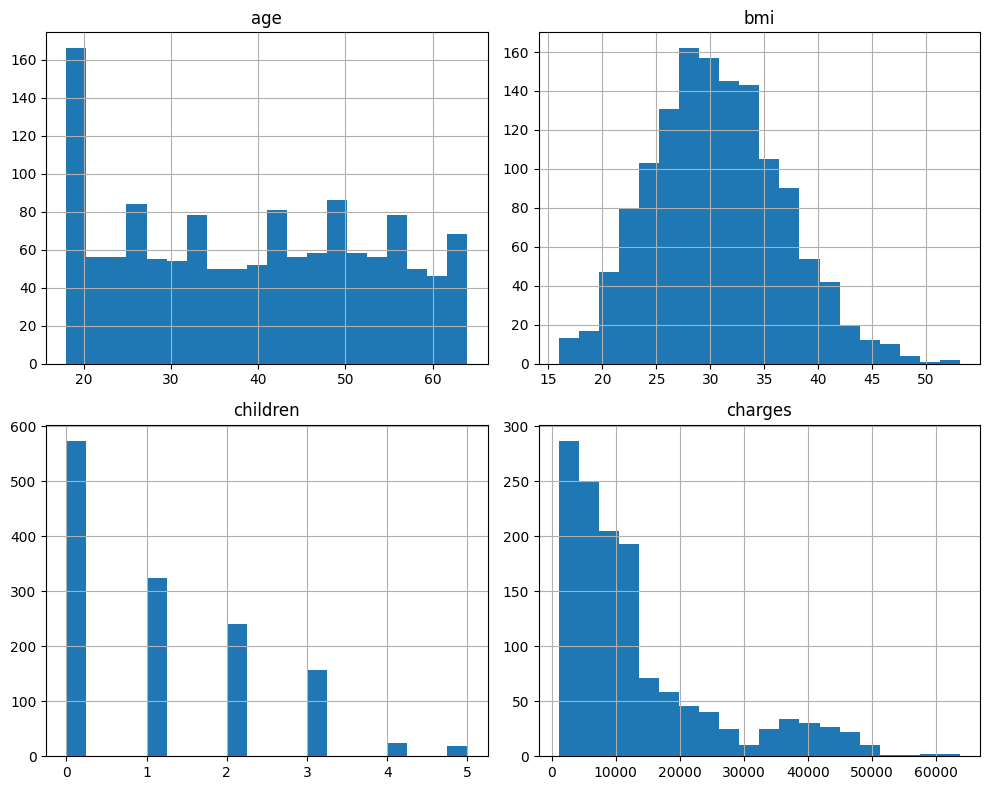

In [17]:
#plot histogram
df[['age', 'bmi', 'children', 'charges']].hist(bins=20,figsize=(10,8))
plt.tight_layout()
plt.show()

In [18]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


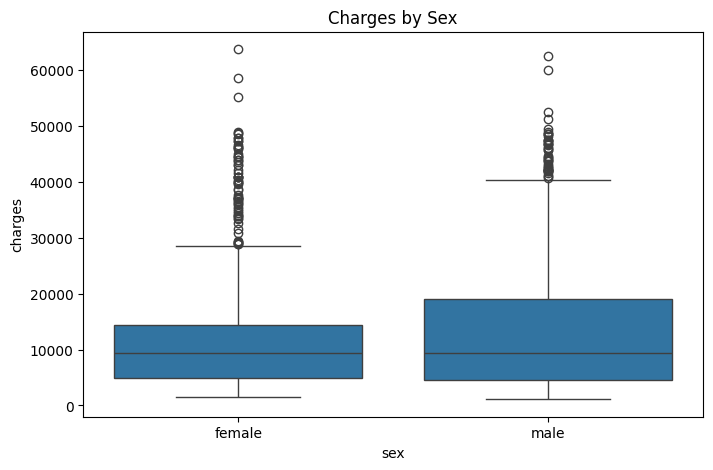

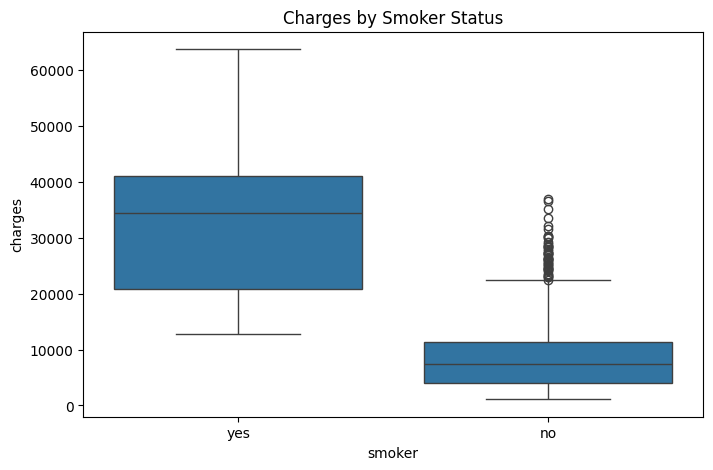

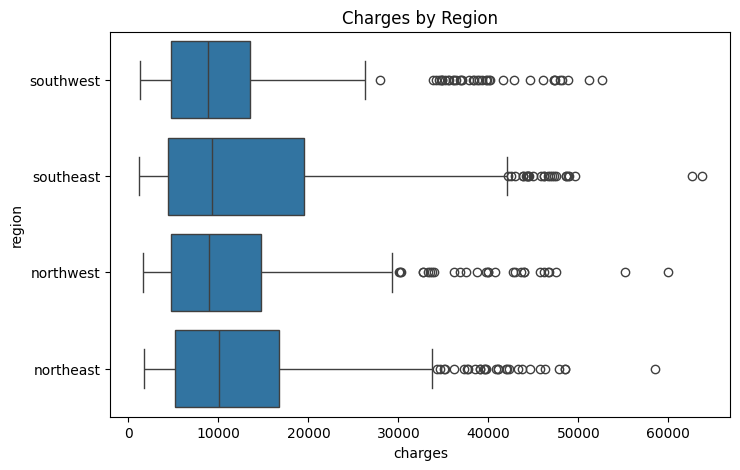

In [19]:
# Boxplot of charges by sex
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Sex')
plt.show()

# Boxplot of charges by smoker status
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()

# Boxplot of charges by region
plt.figure(figsize=(8, 5))
sns.boxplot(x='charges', y='region', data=df)
plt.title('Charges by Region')
plt.show()

**Summary Analysis of Each Plot**

**1.Boxplot of Charges by Sex**

Observation:

The distribution of charges for male and female beneficiaries is quite similar. Both distributions have a comparable median (the line inside the box) and similar interquartile ranges (IQR) (the height of the box).
There are several outliers (circles above the whiskers) for both sexes, indicating that some individuals have very high charges, likely due to significant health issues or high-risk profiles.
The whiskers (lines extending from the box) suggest that the majority of individuals, regardless of sex, have charges that lie below a certain level, with a small number of cases experiencing much higher charges.

Insights:

Gender does not appear to significantly impact medical charges. While there are high outliers in both groups, the median and range of charges are similar.
This implies that other factors, such as age, BMI, and smoking status, might play a more critical role in determining charges.
Note for Candidates:

It’s important to identify which variables have the most significant impact on the target (charges). This plot suggests that sex alone may not be a strong predictor.

**2.Boxplot of Charges by Smoker Status**

Observation:

There is a clear distinction between charges for smokers and non-smokers.
Smokers have a significantly higher median and a wider range of charges, with a large number of outliers extending towards very high medical expenses.
Non-smokers generally have lower medical charges, with a narrower range and fewer high-cost outliers.
Insights:

Smoking status is a strong predictor of medical charges. Smokers tend to have much higher medical costs, likely due to smoking-related health issues such as respiratory diseases, heart conditions, and other chronic illnesses.
This variable should be given significant weight in any predictive model.
Note for Candidates:

Identifying strong predictors like smoking status can help create a more accurate model. Consider feature importance analysis to validate this during model training.

**3.Boxplot of Charges by Region**

Observation:

There is some variation in charges across regions, but the differences are not as pronounced as in the smoker status plot.
Southeast shows a slight tendency toward higher charges compared to other regions (e.g., a few more outliers above $40,000).
The median charges are relatively similar across all regions, suggesting that geographical region alone may not drastically affect medical charges.

Insights:

Region might contribute to differences in healthcare costs, possibly due to regional cost of living or access to healthcare facilities.
However, its impact appears moderate compared to other factors like smoking status.

**Note:**

Geographical differences may provide some predictive power but are likely to be supplementary features rather than primary predictors in the model.

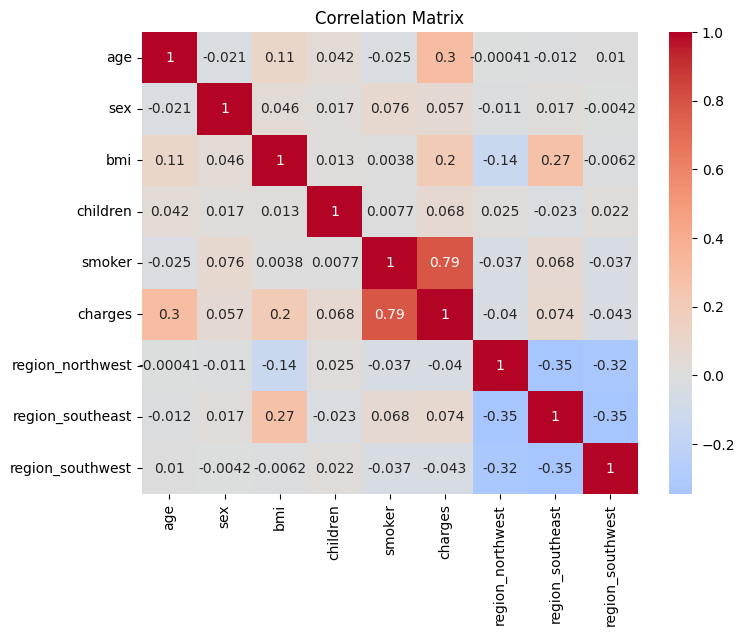

In [20]:
# Encode 'sex' and 'smoker' using label encoding as they are binary
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Encode 'region' using one-hot encoding since it has more than two categories
df = pd.get_dummies(df, columns=['region'], drop_first=True)


# Now calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

**Analysis of Correlation Matrix**

Observation:

The correlation between smoker and charges is 0.79, indicating a strong positive relationship—smokers tend to have higher charges.
Age and bmi also show positive correlations with charges (0.3 and 0.2, respectively), though weaker compared to the smoker status.
Children, sex, and region show relatively low correlations with charges, indicating they may have a less direct influence on the target variable.

Insights:

The smoker feature is the most influential in predicting charges based on this correlation analysis.
Age and bmi could be important as secondary features, especially if combined with smoker status.
While correlation does not imply causation, these relationships provide a solid starting point for feature selection.
Note for Candidates:

Understanding correlation helps identify which features to focus on during model building. Feature engineering could improve relationships between predictors and the target variable.

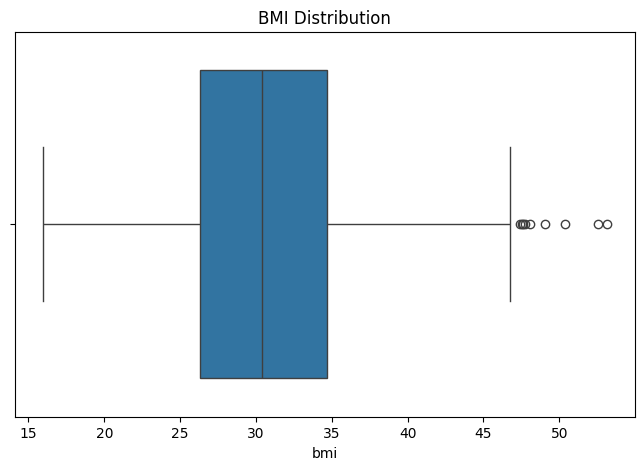

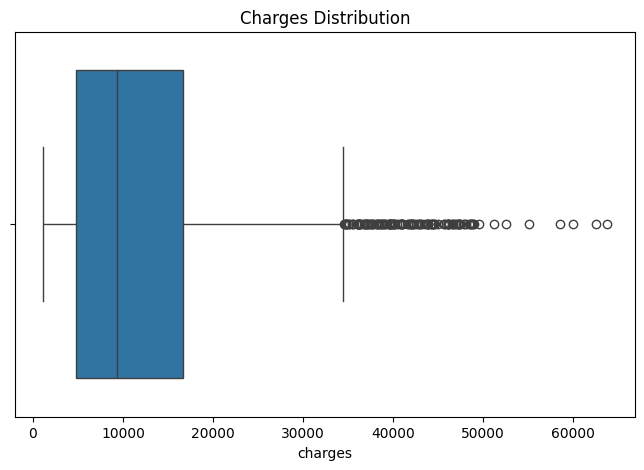

In [21]:
# Boxplot for BMI
plt.figure(figsize=(8, 5))
sns.boxplot(x='bmi', data=df)
plt.title('BMI Distribution')
plt.show()

# Boxplot for Charges
plt.figure(figsize=(8, 5))
sns.boxplot(x='charges', data=df)
plt.title('Charges Distribution')
plt.show()

**BMI Distribution and Charges Distribution Plots Analysis**


**1.BMI Distribution**

Observation:

The boxplot shows that the BMI values are centered around 30, with most of the values falling between 25 and 35.
There are a few outliers on the right side, with BMI values exceeding 40, reaching up to 50 or more.
The whiskers extend roughly from 15 to 45, suggesting that most BMI values fall within this range.
Insights:

Outliers:

The individuals with a BMI above 40 could represent those who are classified as obese, which might have implications for their medical expenses.
Concentration around 30: Since most individuals have a BMI around 30, this suggests that the dataset includes a significant number of people in the overweight to mildly obese category.
Potential Impact on Charges: Given the correlation seen earlier between BMI and charges, these outliers and the overall BMI range could play a role in predicting higher charges.
Note for Candidates:

Pay attention to outliers in predictors like BMI, as they might have an outsized effect on the model’s predictions.
Consider whether to keep or transform these values, especially if they heavily influence the target variable (charges).

**2.Charges Distribution**

Observation:

The boxplot for charges shows a significant right-skewed distribution.
The majority of charges lie below 20,000, as indicated by the height of the box, with the median around 10,000.
There are numerous outliers above 30,000, extending up to 60,000 and beyond.
Insights:

Right-Skewed Distribution: The presence of many high outliers suggests that a small number of individuals incur very high medical costs, possibly due to severe health conditions or high-risk profiles (e.g., smokers).
Transformations Needed: To normalize this right-skewed distribution, consider applying a log transformation on charges before modeling. This will make the data more symmetric and potentially improve the performance of linear regression models.

High-Cost Cases: The outliers may represent important cases like chronic illnesses or complex medical needs. It’s important to understand whether these values should be treated as genuine high-risk cases or if any data points should be excluded for better model generalization.
Note for Candidates:

Skewness in the target variable can lead to biased predictions. It’s crucial to apply the right data transformation techniques.
Outliers can be valuable in understanding high-cost drivers but can also skew model results if not handled appropriately.

In [22]:
df['log_charges'] = np.log(df['charges']+1)

In [23]:
df[['region_northwest', 'region_southeast', 'region_southwest']] = df[['region_northwest', 'region_southeast', 'region_southwest']].astype(int)

**Data Transformation (Address Skewness in charges)**

The charges variable is right-skewed due to a few high-cost cases. This can affect the performance of models like linear regression.

Applying a log transformation to charges can help make the data more normally distributed, which is beneficial for many predictive models.

Why This Step?: It helps stabilize the variance and makes relationships between charges and other predictors more linear, improving the fit of models like linear regression.



**Feature Encoding and Scaling**

In [24]:
# Initilize a scaler for numerical features
scaler = StandardScaler()

#Scale the numerical features
df[['age','bmi','children']] = scaler.fit_transform(df[['age','bmi','children']])

Ensure all categorical variables are properly encoded for model training.

For example, sex and smoker should already be encoded as 0 and 1, and regions should be represented as one-hot encoded variables.

Scale numerical variables like age, bmi, and children to ensure they’re on a similar scale, which can be beneficial for some models (e.g., regression, SVM).

Why This Step?: Scaling ensures that variables with larger values do not dominate the training process, leading to better model performance.

In [25]:
df[['age','bmi','children']]

,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,-1.509965,0.206139,-0.908614
1335,-1.509965,1.014878,-0.908614
1336,-1.296362,-0.797813,-0.908614


**Train-Test Split**

Split the data into training and testing sets to evaluate the model’s performance on unseen data. This ensures the model generalizes well.

Why This Step?: It allows us to train the model on one part of the data and test its performance on another, helping to avoid overfitting (where a model learns the training data too well but fails on new data).

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#Define features and targets variables
X = df.drop(columns=['charges','log_charges']) # use log_charges as the target
y = df['log_charges']

# Split the data into training and testing sets (80% train and 20% test)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [28]:
X_train

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
560,0.483668,0,-1.757474,0.751079,0,1,0,0
1285,0.554869,0,-1.040599,-0.908614,0,0,0,0
1142,0.910875,0,-0.952015,-0.908614,0,0,1,0
969,-0.014740,0,0.599846,3.240619,0,0,1,0
486,1.053277,0,-1.508126,1.580926,0,1,0,0
...,...,...,...,...,...,...,...,...
1095,-1.509965,0,0.112633,2.410772,0,0,0,0
1130,-0.014740,0,-1.114419,3.240619,0,0,1,0
1294,1.338082,1,-0.900341,-0.908614,0,0,0,0
860,-0.157143,0,2.778356,0.751079,1,0,0,1


In [29]:
y_train

,log_charges
560,9.126398
1285,9.052009
1142,10.207990
969,9.059265
486,9.431590
...,...
1095,8.425558
1130,9.057574
1294,9.386990
860,10.738883


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#initilize the model
linear_model = LinearRegression()

#Train the model on the training set
linear_model.fit(X_train,y_train)

# Make Predictions on the test set
y_pred = linear_model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.1755091085532075
R^2 Score: 0.8047410791393022


In [31]:
from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha=1.0) # Adjust alpha to tune the regularization strength
ridge_model.fit(X_train,y_train)
y_pred_ridge = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test,y_pred_ridge)
ridge_r2 = r2_score(y_test,y_pred_ridge)

print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Ridge Regression R2 Score: {ridge_r2}")

Ridge Regression MSE: 0.1756282407439873
Ridge Regression R2 Score: 0.8046085411576372


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(linear_model,X_train,y_train,cv=5,scoring='r2')
print(f"Cross Validation R2: {np.mean(cv_scores)}")

Cross Validation R2: 0.7512936891031987


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Interaction Terms
df['smoker_bmi'] = df['smoker'] * df['bmi']
df['age_bmi'] = df['age'] * df['bmi']
df['children_smoker'] = df['children'] * df['smoker']

# Polynomial Features (degree=2 for age, bmi, children)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['age', 'bmi', 'children']])

# Add these polynomial features back to the dataframe
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['age', 'bmi', 'children']))
df = pd.concat([df, df_poly], axis=1)

# Drop any redundant features if necessary
X = df.drop(columns=['charges', 'log_charges'])  # Dropping target variable from features
y = df['log_charges']  # Using log-transformed charges as the target


In [34]:
from sklearn.model_selection import train_test_split

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Set up the grid of parameters to tune
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_model = RandomForestRegressor(random_state=42)
rf_cv = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit the model
rf_cv.fit(X_train, y_train)

# Best parameters and performance
print(f"Best Parameters for Random Forest: {rf_cv.best_params_}")
print(f"Best Cross-Validation R²: {rf_cv.best_score_}")

# Make predictions on the test set
y_pred_rf = rf_cv.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R² Score: {rf_r2}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best Cross-Validation R²: 0.8116291803404924
Random Forest MSE: 0.13071643740251132
Random Forest R² Score: 0.8545742114675969


In [46]:
print(X_train.dtypes)


age                 int64
sex                 int64
bmi                 int64
children            int64
smoker              int64
region_northwest    int64
region_southeast    int64
region_southwest    int64
smoker_bmi          int64
age_bmi             int64
children_smoker     int64
age                 int64
bmi                 int64
children            int64
age^2               int64
age bmi             int64
age children        int64
bmi^2               int64
bmi children        int64
children^2          int64
dtype: object


In [49]:
# Convert the pandas DataFrame to a NumPy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Set up the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Perform hyperparameter tuning with GridSearchCV
xgb_cv = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit the model to the training data
xgb_cv.fit(X_train, y_train)

# Output the best parameters from the grid search
print(f"Best Parameters for XGBoost: {xgb_cv.best_params_}")
print(f"Best Cross-Validation R²: {xgb_cv.best_score_}")

# Make predictions on the test set using the best model
y_pred_xgb = xgb_cv.predict(X_test)

# Evaluate the model on the test data
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {xgb_mse}")
print(f"XGBoost R² Score: {xgb_r2}")

# Perform cross-validation on the best XGBoost model
cv_scores_xgb = cross_val_score(xgb_cv.best_estimator_, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R² for XGBoost: {np.mean(cv_scores_xgb)}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best Cross-Validation R²: 0.7429727687289394
XGBoost MSE: 0.19789360502210387
XGBoost R² Score: 0.7798376843208972
Cross-Validation R² for XGBoost: 0.7429727687289394


In [51]:
import joblib

# Save Random Forest
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save XGBoost
joblib.dump(xgb_cv.best_estimator_, 'xgboost_model.pkl')

# Save Linear Regression
#joblib.dump(lr_model, 'linear_regression_model.pkl')

['xgboost_model.pkl']

In [59]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the saved model
model = joblib.load('random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get the JSON data from the request
    prediction = model.predict([data['features']])
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
  app.run(debug=True, host='0.0.0.0', port=5001)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://172.28.0.12:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
